# Transfer Learning VGG16 and VGG19 using Keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model, Sequential

from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3

from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from glob import glob
import os
import tensorflow as tf

In [ ]:
IMAGE_SIZE = [224,224,3]

In [ ]:
train_data = '/content/drive/MyDrive/chest_xray/train/'
validation_data = '/content/drive/MyDrive/chest_xray/val/'
test_data = '/content/drive/MyDrive/chest_xray/test/'
test_data_normal = '/content/drive/MyDrive/chest_xray/test/NORMAL'
test_data_pneumonia = '/content/drive/MyDrive/chest_xray/test/PNEUMONIA'

## VGG16

In [ ]:
vgg16 = VGG16( include_top = False,
    weights = 'imagenet',
    input_shape = IMAGE_SIZE)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
folders = glob(r'/content/drive/MyDrive/chest_xray/train')

In [ ]:
vgg16.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
top_model = vgg16.output
top_model = Flatten(name='flatten')(top_model)
top_model = Dense(4096, activation='relu')(top_model)
top_model = Dense(1072, activation='relu')(top_model)
top_model = Dropout(0.2)(top_model)
output_layer = Dense(1, activation='sigmoid')(top_model)

In [ ]:
model_vgg16 = Model(inputs=vgg16.input, outputs=output_layer)

In [ ]:
model_vgg16.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics='accuracy'
)

In [ ]:
model_vgg16 .summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 16 images belonging to 2 classes.


In [ ]:
r = model_vgg16.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
163/163 [==============================] - 112s 677ms/step - loss: 0.0707 - accuracy: 0.9767 - val_loss: 0.9271 - val_accuracy: 0.7500
Epoch 2/5
163/163 [==============================] - 108s 660ms/step - loss: 0.0897 - accuracy: 0.9704 - val_loss: 0.1905 - val_accuracy: 0.9375
Epoch 3/5
163/163 [==============================] - 108s 665ms/step - loss: 0.0614 - accuracy: 0.9784 - val_loss: 0.3088 - val_accuracy: 0.8750
Epoch 4/5
163/163 [==============================] - 109s 670ms/step - loss: 0.0860 - accuracy: 0.9639 - val_loss: 0.2701 - val_accuracy: 0.8750
Epoch 5/5
163/163 [==============================] - 108s 660ms/step - loss: 0.0481 - accuracy: 0.9830 - val_loss: 0.1355 - val_accuracy: 0.9375


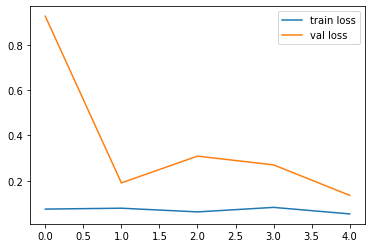

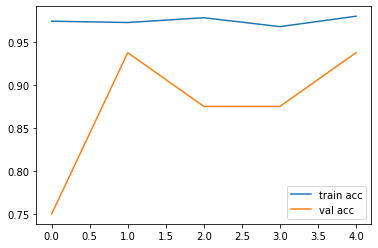

In [ ]:
# Plotting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# PLotting the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf

from keras.models import load_model

## VGG19

In [ ]:
vgg19 = VGG19( include_top = False,
    weights = 'imagenet',
    input_shape = IMAGE_SIZE)

In [ ]:
for layers in vgg19.layers:
  layers.trainable = False

In [ ]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
top_model = vgg19.output
top_model = Flatten(name='flatten')(top_model)
top_model = Dense(4096, activation='relu')(top_model)
top_model = Dense(1072, activation='relu')(top_model)
top_model = Dropout(0.2)(top_model)
output_layer = Dense(1, activation='sigmoid')(top_model)

In [ ]:
model_vgg19 = Model(inputs=vgg19.input, outputs=output_layer)

In [ ]:
model_vgg19.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
model_vgg19.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics='accuracy'
)

In [ ]:
s = model_vgg19.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
163/163 [==============================] - 117s 706ms/step - loss: 2.7759 - accuracy: 0.8087 - val_loss: 0.6503 - val_accuracy: 0.7500
Epoch 2/5
163/163 [==============================] - 111s 682ms/step - loss: 0.1628 - accuracy: 0.9314 - val_loss: 0.3202 - val_accuracy: 0.8750
Epoch 3/5
163/163 [==============================] - 111s 682ms/step - loss: 0.1418 - accuracy: 0.9418 - val_loss: 0.8630 - val_accuracy: 0.6875
Epoch 4/5
163/163 [==============================] - 112s 683ms/step - loss: 0.1332 - accuracy: 0.9486 - val_loss: 0.1731 - val_accuracy: 0.9375
Epoch 5/5
163/163 [==============================] - 111s 680ms/step - loss: 0.1216 - accuracy: 0.9508 - val_loss: 0.2539 - val_accuracy: 0.8125


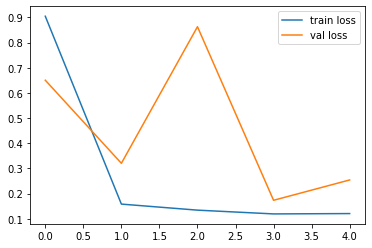

In [ ]:
plt.plot(s.history['loss'], label='train loss')
plt.plot(s.history['val_loss'], label='val loss')
plt.legend()
plt.show()

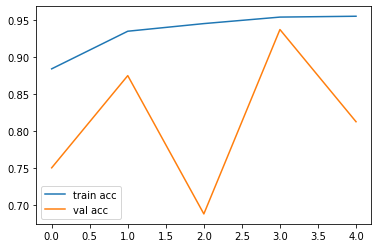

In [ ]:
plt.plot(s.history['accuracy'], label='train acc')
plt.plot(s.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
os.chdir('/content/drive/MyDrive/chest_xray/')

In [ ]:
model_vgg19.save('model_vgg19.h5')
model_vgg16.save('model_vgg16.h5')

## Loading the model and predicting using the test data

In [ ]:
from tensorflow import keras


model_vgg16 = keras.models.load_model("/content/drive/MyDrive/chest_xray/model_vgg16.h5")
model_vgg19 = keras.models.load_model("/content/drive/MyDrive/chest_xray/model_vgg19.h5")

In [ ]:
os.chdir('/content/drive/MyDrive/chest_xray/test/NORMAL/')
cwd = os.getcwd()
files = os.listdir(cwd)

In [ ]:
normal_image = []
preprocessed_normal = []

for filename in files:
  img= image.load_img(filename, target_size=(224,224))
  img_array = image.img_to_array(img)
  img_batch = np.expand_dims(img_array, axis=0)
  img_preprocessed = preprocess_input(img_batch)
  preprocessed_normal.append(img_preprocessed)
  normal_image.append(filename)

In [ ]:
normal_preds = []
for x in preprocessed_normal:
  classes = model_vgg16.predict(x)
  normal_preds.append(classes)

In [ ]:
os.chdir('/content/drive/MyDrive/chest_xray/test/PNEUMONIA/')
cwd = os.getcwd()
files = os.listdir(cwd)

In [ ]:
pneumonia_image = []
preprocessed_pneumonia = []

for filename in files:
  img= image.load_img(filename, target_size=(224,224))
  img_array = image.img_to_array(img)
  img_batch = np.expand_dims(img_array, axis=0)
  img_preprocessed = preprocess_input(img_batch)
  preprocessed_pneumonia.append(img_preprocessed)
  pneumonia_image.append(filename)

In [ ]:
pneumonia_preds = []
for x in preprocessed_pneumonia:
  classes = model_vgg16.predict(x)
  pneumonia_preds.append(classes)

In [ ]:
pneumonia_preds

[array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[0.9999999]], dtype=float32),
 

* We now have 2 arrays containing the predicted values for the normal images and the pneumonia images. If we want we can further create an Dataframe to better visualize the result of these predictions.